In [3]:
import pandas as pd

In [4]:
df=pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
x = df[["CreditScore","Age" , "Balance", "EstimatedSalary", "IsActiveMember","Gender","Geography"]]
y=df["Exited"]


In [6]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [7]:
le_gender = LabelEncoder()
le_geo = LabelEncoder()

x["Gender"] = le_gender.fit_transform(x["Gender"])
x["Geography"] = le_geo.fit_transform(x["Geography"])

C:\Users\SIKHA\AppData\Local\Temp\ipykernel_19616\1771928891.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Gender"] = le_gender.fit_transform(x["Gender"])
C:\Users\SIKHA\AppData\Local\Temp\ipykernel_19616\1771928891.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Geography"] = le_geo.fit_transform(x["Geography"])


In [8]:
print(df.isnull().sum())


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
print(x.head())


   CreditScore  Age    Balance  EstimatedSalary  IsActiveMember  Gender  \
0          619   42       0.00        101348.88               1       0   
1          608   41   83807.86        112542.58               1       0   
2          502   42  159660.80        113931.57               0       0   
3          699   39       0.00         93826.63               0       0   
4          850   43  125510.82         79084.10               1       0   

   Geography  
0          0  
1          2  
2          0  
3          0  
4          2  


In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [13]:

model = Sequential()
model.add(Dense(units=20, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))  


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=32, epochs=50, verbose=1)

Epoch 1/50


c:\Users\SIKHA\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4016 - loss: 0.8416
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7936 - loss: 0.4823
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8131 - loss: 0.4415
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8225 - loss: 0.4244
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8333 - loss: 0.4102
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8294 - loss: 0.4108
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8346 - loss: 0.3985
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8328 - loss: 0.3998
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8364 - loss: 0.3972
Epoch 10/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8371 - loss: 0.3962
Epoch 11/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8325 - loss: 0.4024
Epoch 12/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy

In [14]:
loss, accuracy = model.evaluate(X_test, y_test)

print(f"Test Accuracy: {accuracy:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8336 - loss: 0.4062
Test Accuracy: 0.8415


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


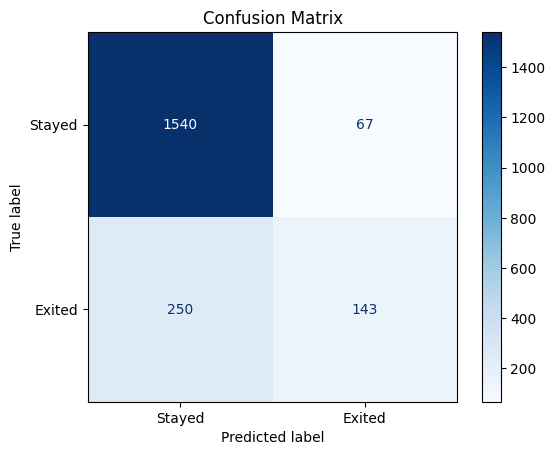

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Stayed", "Exited"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [1]:
pip install joblib


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import joblib

# Save the model
joblib.dump(model, 'model.pkl')

# Load it later
# model = joblib.load('model.pkl')


['model.pkl']